# Solutore polinomiale
#### (versione con torch)

Luca Mari, aprile 2023

Questo solutore approssima funzioni $\mathbb{R} \rightarrow \mathbb{R}$, per esempio $sin(x)$ tra $-\pi$ e $\pi$, mediante un polinomio di grado $n$, di cui stima i parametri.

In [61]:
import numpy as np
import torch
import matplotlib.pyplot as plt

#device = torch.device("cpu")
device = torch.device("cuda:0")
dtype = torch.float

Decidi la funzione -- che nella fase di test si supporrà ignota, ovviamente -- da approssimare.

In [62]:
the_fun = lambda x: torch.sin(x)    # la funzione da approssimare
the_min = -np.pi                    # l'argomento minimo
the_max = np.pi                     # l'argomento massimo
num_pts = 1000

x = torch.linspace(the_min, the_max, num_pts, device=device, dtype=dtype)
y = the_fun(x)

Decidi il grado del polinomio, la dimensione del training set e il _learning rate_.

In [63]:
n = 4                           # grado del polinomio approssimante
trainingset_size = 5000         # numero di datapoint per ogni addestramento
learning_rate = 1e-6

Definisci la funzione di addestramento, per prima cosa inizializzando i parametri del polinomio come valori casuali da una gaussiana standard.

In [64]:
def train(x, y, n:int, trainingset_size:int, learning_rate:float, log:bool=False):
    w = torch.randn(size=[n], device=device, dtype=dtype)

    poly = torch.zeros(size=[n, len(x)], device=device, dtype=dtype)
    grad = torch.zeros(size=[n], device=device, dtype=dtype)

    for i in range(trainingset_size):
        for j in range(n): poly[j] = x.pow(j)               # forward pass
        y_pred = w.T @ poly

        if log:                                             # calcola e visualizza l'errore
            mse = (y_pred - y).pow(2).sum().item()
            if i % 1000 == 0: print(i, mse)

        grad_y_pred = 2.0 * (y_pred - y)                    # back propagation
        for j in range(n): grad[j] = (grad_y_pred * x.pow(j)).sum()

        for j in range(n): w[j] -= learning_rate * grad[j]  # aggiorna i pesi
    return w

E finalmente esegui il processo di apprendimento, e quindi calcola e visualizza il polinomio, confrontandolo con la funzione da approssimare.

0 18166.125
1000 426.92681884765625
2000 60.66225814819336
3000 12.040040969848633
4000 5.479238510131836


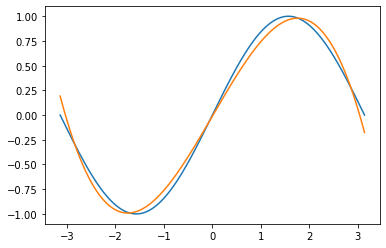

In [65]:
w = train(x, y, n, trainingset_size, learning_rate, True)

yy = torch.zeros(num_pts, device=device, dtype=dtype)
for j in range(n): yy += w[j] * x.pow(j)

xx = x.detach().cpu().numpy()
y = y.detach().cpu().numpy()
yy = yy.detach().cpu().numpy()

plt.plot(xx, y)
plt.plot(xx, yy)
plt.show()